# Online Meal Delivery Demand Forecast

In [1]:
#Load required Libraries

import pandas as pd
import numpy as np

### Loading data

In [2]:
#Loading data - each dataset
#Order details
orders = pd.read_csv("train.csv")
#Meal information details
meal_info = pd.read_csv("meal_info.csv")
#Fulfillment center details
fulfillment = pd.read_csv("fulfilment_center_info.csv")

### Data Understanding

In [3]:
print(type(orders))
print(type(fulfillment))
print(type(meal_info))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
#Checking data with few lines to understand indepent variables
orders.head(3)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


In [5]:
#Checking data with few lines to understand indepent variables
meal_info.head(3)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai


In [6]:
#Checking data with few lines to understand indepent variables
fulfillment.head(3)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


# Data Pre-processing

### Data cleaning

In [7]:
#Joining data 

orders_meal = pd.merge(orders, fulfillment, on='center_id', how='left')

In [8]:
#Joining data 

orders_full = pd.merge(orders_meal, meal_info, on='meal_id', how='left')

In [9]:
#To check the data after joining each data set
orders_full.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai


In [10]:
#Exporting to csv file to view the data/For easy use in future
orders_full.to_csv("fulldata.csv")

## Exploratory Data Analysis

In [11]:
#To check the summary of the data
orders_full.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


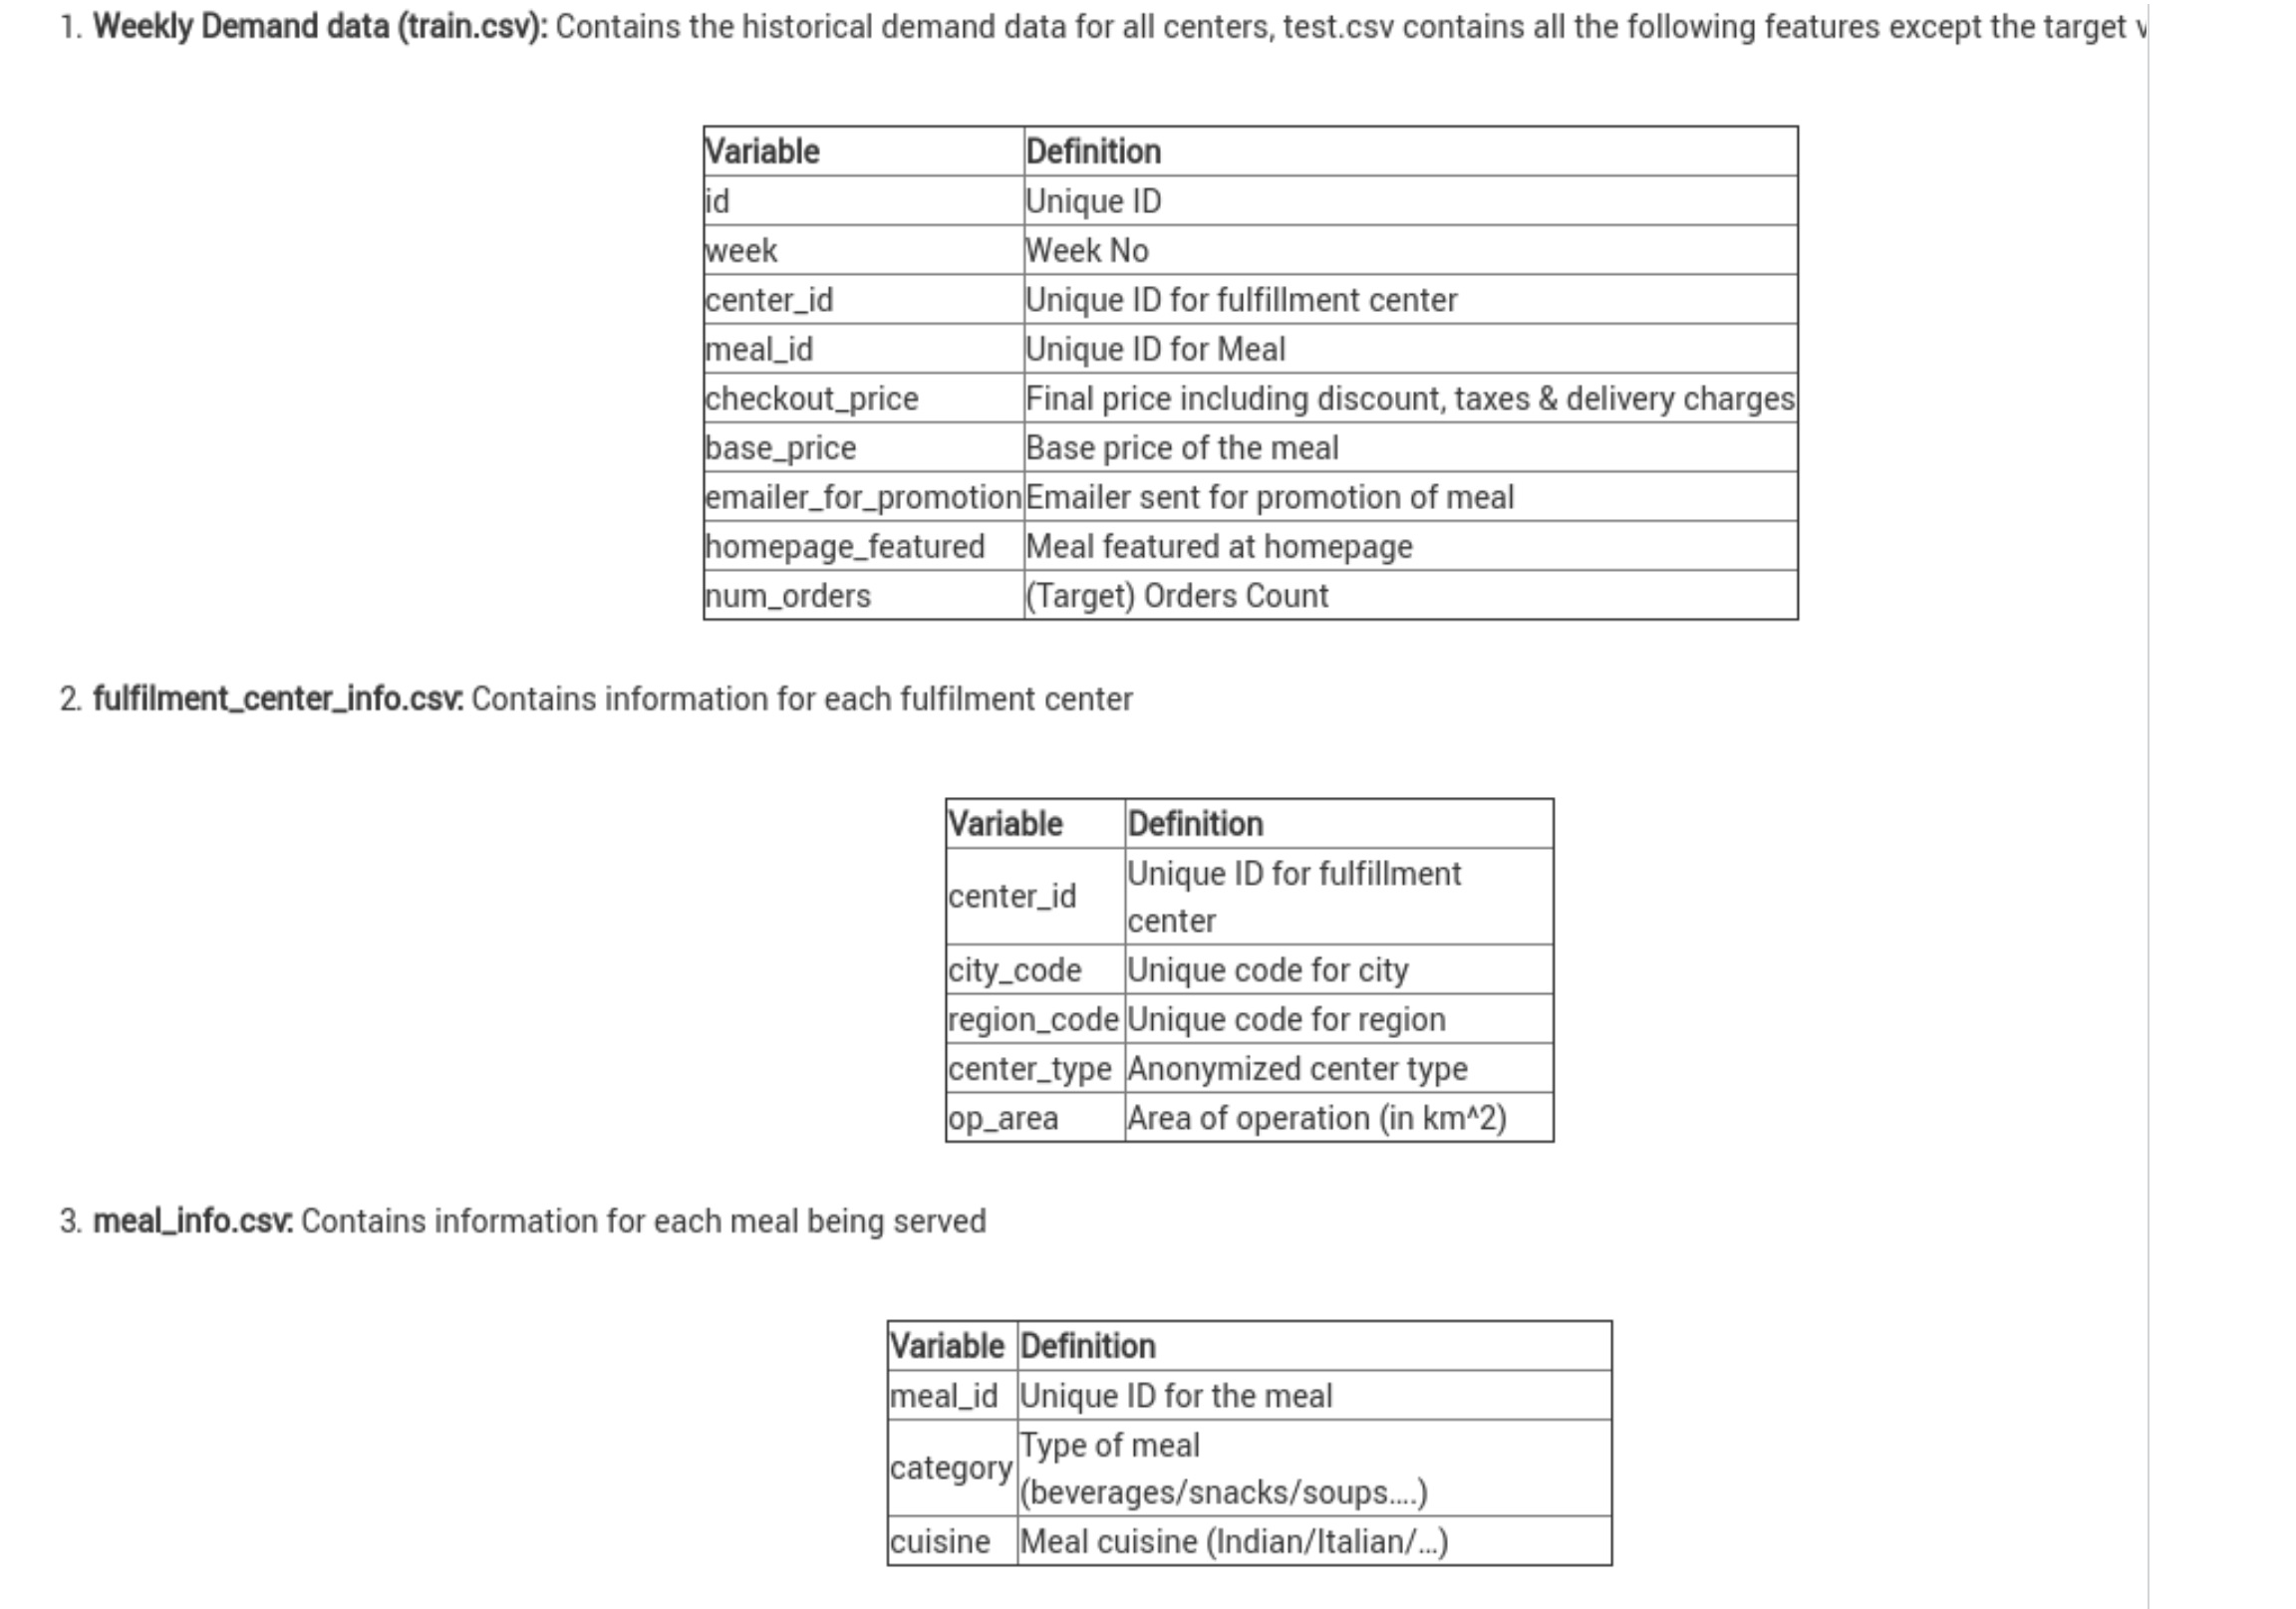

In [12]:
#To check each of the attribute
orders_full.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [13]:
#To check datatypes of each attribute
orders_full.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [14]:
#To check null values 
orders_full.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [15]:
#To check shape of the dataset
orders_full.shape

(456548, 15)

In [16]:
#To check unique values 
orders_full.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [17]:
#Getting unique values of each attributes
for i in orders_full.columns:
    print('Number of unique values in {} column are {} \n The unique values are {}'. format(i, len(orders_full[i].unique()), orders_full[i].unique()))
    print('-------------------------------\n')

Number of unique values in id column are 456548 
 The unique values are [1379560 1466964 1346989 ... 1110849 1147725 1361984]
-------------------------------

Number of unique values in week column are 145 
 The unique values are [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
-------------------------------

Number of unique values in center_id column are 77 
 The unique values are [ 55  24  11  83  32  13 109  52  93 186 146  57 149  89 124 152  97  74

# Data Visualization

### Understanding Data distribution with Target 

In [18]:
#Importing seaborn and Matplotlib Library
import seaborn as sns
from matplotlib import pyplot as plt

### Data distribution of Every week

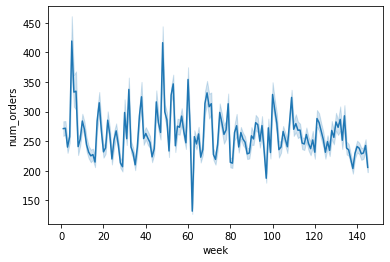

In [19]:
#Data distribution for Every week
sns.lineplot(orders_full['week'],orders_full['num_orders'])

### Observation: 

1. There seems good seasonality. 
2. 5th and 50th week had good peak sales
3. 62nd week had huge dip in sales. 

In [20]:
#Number of orders each week 
orders_full.groupby('week')['num_orders'].mean()

week
1      271.136550
2      271.783149
3      239.828217
4      257.365524
5      419.263729
          ...    
141    237.891511
142    228.431439
143    229.932224
144    242.639915
145    205.607711
Name: num_orders, Length: 145, dtype: float64

### Data distribution of Center_id

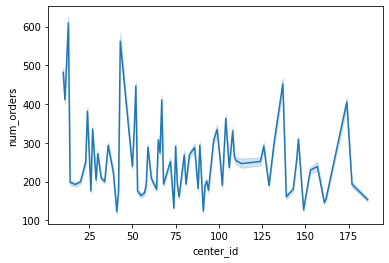

In [21]:
#Data distribution of Center_id
sns.lineplot(orders_full['center_id'],orders_full['num_orders'])


### Target attribute distribution

Text(0.5, 1.0, 'num_orders Distribution')

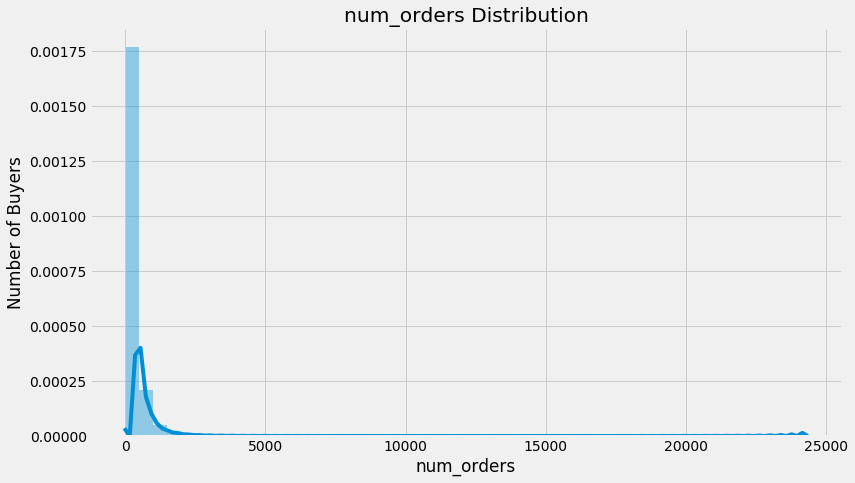

In [22]:
#To understand Target attribute distribution(Number of orders)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(orders_full.num_orders)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [23]:
#Taking log of target attribute - to view distribution clearly
visu_train = np.sqrt(orders_full['num_orders'])

Text(0.5, 1.0, 'num_orders Distribution_LogTransfermation')

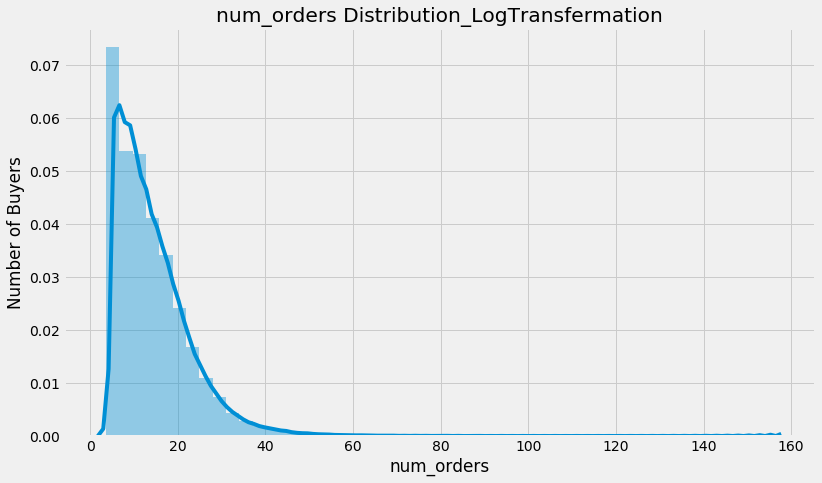

In [24]:
#To understand Target attribute distribution(Number of orders) - Transformed data(Log transformation)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(visu_train)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution_LogTransfermation")

### Observation: 

1. Target attribute is forming Normal distribution when we have log of data.

## Data distribution for Categorical attributes

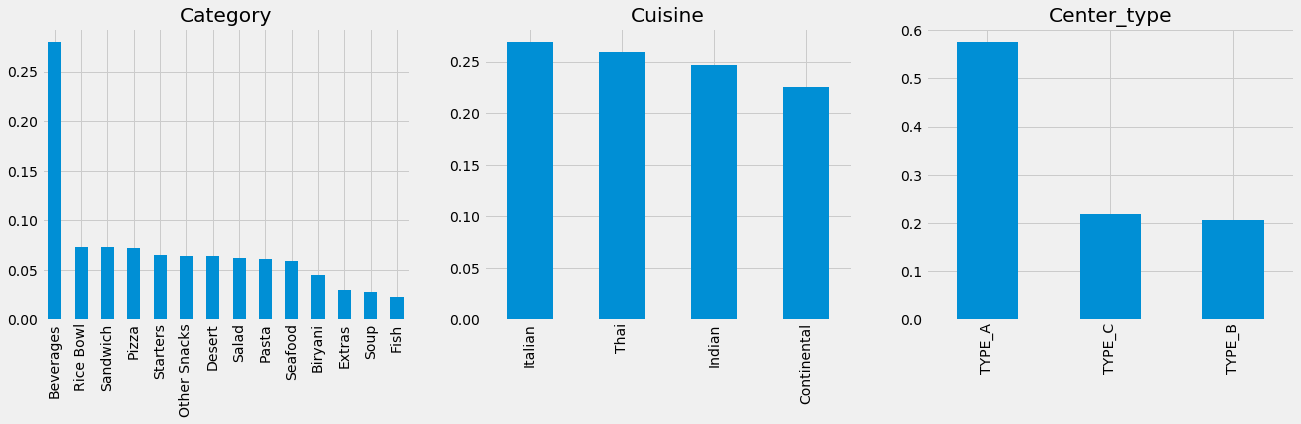

In [25]:
#Plotting distribution for Category, Cuisine, Center_type

plt.figure(3)

plt.subplot(131)
orders_full['category'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Category')

plt.subplot(132)
orders_full['cuisine'].value_counts(normalize=True).plot.bar(figsize = (20,5), title = "Cuisine")

plt.subplot(133)
orders_full['center_type'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Center_type')


### Observation:

1. Bevareges is peak sales item. 

2. Center type A has good demand and sales. 

3. Surprisingly, Center type C is performing better than Type B. 

4. Italian cuisine has more sales than Indian cuisine. 

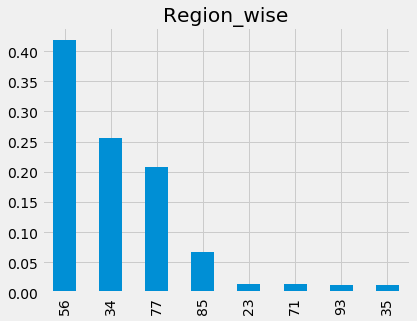

In [26]:
#Plotting distribution for Region_wise/Center wise
plt.figure(1)

plt.subplot(231)
orders_full['region_code'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Region_wise')

## Observation:

1. Center  # 56 is best performing center. 
2. More investigation is required on each region. 

### Data Distribution for Cuisine

### Italian cuisine distribution

In [27]:
#To get Italian cuisine and understand the distributin
italian_cuisine = orders_full[orders_full['cuisine'] == 'Italian']

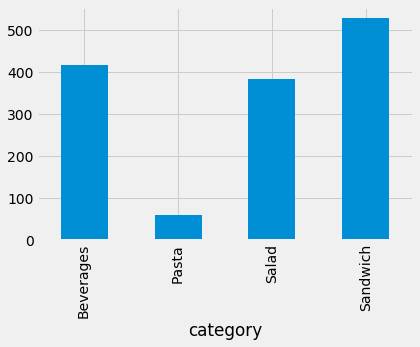

In [28]:
#Data distribution of Italian cuisine
italian_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation:

1. Surprisingly, Italian cusine has more sales of Sandwitch than Pasta
2. Pasta is not demanding item. 
3. Salad has good demand. 

### Indian cuisine distribution

In [29]:
#To get Italian cuisine and understand the distributin
indian_cuisine = orders_full[orders_full['cuisine'] == 'Indian']

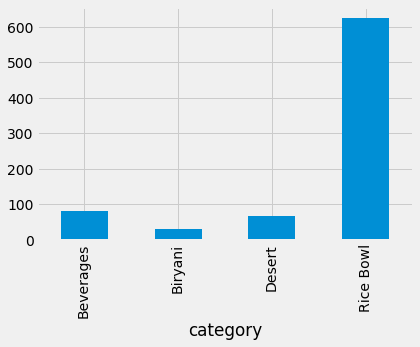

In [30]:
#Data distribution of Italian cuisine
indian_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation: 

1. Rice Bowl is obvious option.
2. Biryani is not preferred option from client business. 

### Thai cuisine distribution

In [31]:
#To get Italian cuisine and understand the distributin
Thai_cuisine = orders_full[orders_full['cuisine'] == 'Thai']

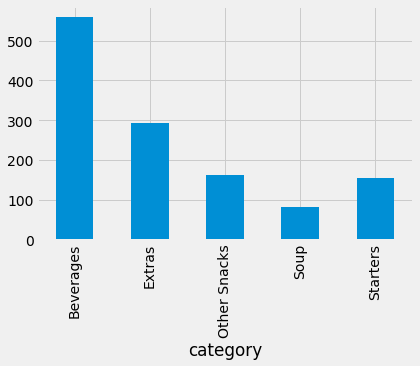

In [32]:
#Data distribution of Italian cuisine
Thai_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation:

1. Beverages is preferred food in Thai cuisine. 
2. Other snacks is major contributor in overall sales. 

### Continental cuisine distribution

In [33]:
#To get Italian cuisine and understand the distributin
Continental_cuisine = orders_full[orders_full['cuisine'] == 'Continental']

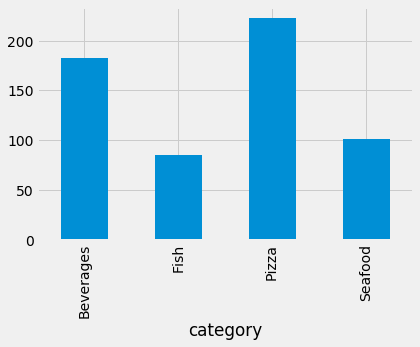

In [34]:
#Data distribution of Italian cuisine
Continental_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation:

1. Pizza is highly demanding food in Continental cuisine.
2. Beverages and seafood also has good demand. 

# Center_id and meal_id distribution details

In [37]:
#Data distribution of meal_id for each center_id
center_meal_count = orders_data.groupby('center_id')['meal_id'].nunique()

In [38]:
#To understand meal_id summary
center_meal_count.describe()

count    77.000000
mean     46.714286
std       3.255995
min      39.000000
25%      45.000000
50%      45.000000
75%      50.000000
max      51.000000
Name: meal_id, dtype: float64

Text(0, 0.5, 'meal_id')

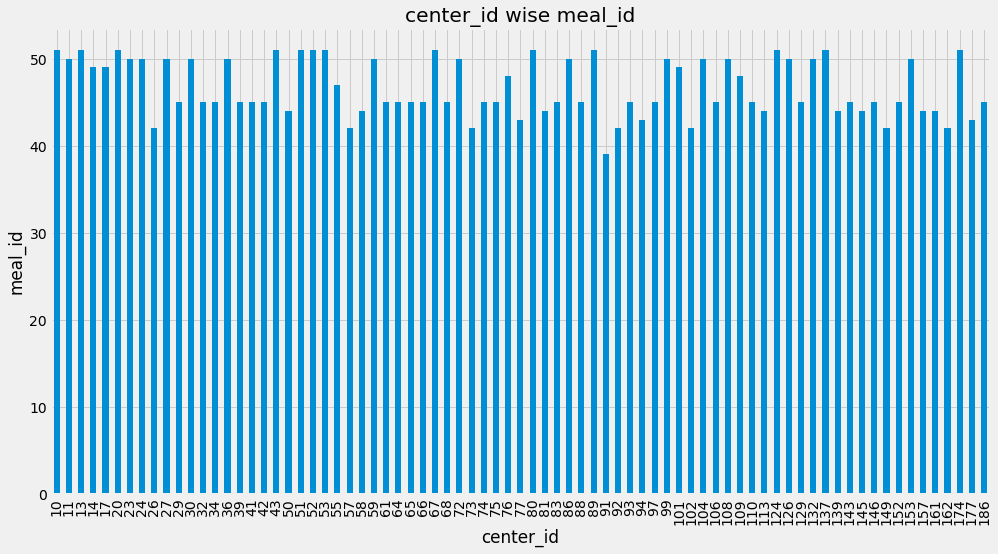

In [39]:
#To get plot on center meal combo distribution
orders_data.groupby('center_id')['meal_id'].nunique().plot.bar(figsize = (15,8), title = 'center_id wise meal_id')
plt.ylabel("meal_id")

# More analysis if required based on client demand

#  Subsetting data for Center_id()

### Subset data 

In [36]:
#Extracting required attributes 
orders_data = orders_full[['week','meal_id','num_orders','center_id']]

In [40]:
#To view the subset data
orders_data.head(3)

,week,meal_id,num_orders,center_id
0,1,1885,177,55
1,1,1993,270,55
2,1,2539,189,55


In [41]:
#To view list of center_id
np.unique(orders_data['center_id']).T

array([ 10,  11,  13,  14,  17,  20,  23,  24,  26,  27,  29,  30,  32,
        34,  36,  39,  41,  42,  43,  50,  51,  52,  53,  55,  57,  58,
        59,  61,  64,  65,  66,  67,  68,  72,  73,  74,  75,  76,  77,
        80,  81,  83,  86,  88,  89,  91,  92,  93,  94,  97,  99, 101,
       102, 104, 106, 108, 109, 110, 113, 124, 126, 129, 132, 137, 139,
       143, 145, 146, 149, 152, 153, 157, 161, 162, 174, 177, 186],
      dtype=int64)

In [42]:
#To subset center_id = 66
order_data_66 = orders_data[orders_data['center_id'] == 66]

In [43]:
#To view list of meal_id in center_id = 66 
np.unique(order_data_66['meal_id']).T

array([1062, 1109, 1207, 1216, 1230, 1247, 1248, 1445, 1525, 1543, 1558,
       1571, 1727, 1754, 1770, 1778, 1878, 1885, 1902, 1962, 1971, 1993,
       2104, 2126, 2139, 2290, 2304, 2306, 2322, 2444, 2490, 2492, 2539,
       2569, 2577, 2581, 2631, 2640, 2664, 2704, 2707, 2760, 2826, 2867,
       2956], dtype=int64)

In [44]:
order_data_66['meal_id']

759       1885
760       1993
761       2539
762       2139
763       2631
          ... 
454185    1543
454186    2304
454187    2664
454188    2569
454189    2490
Name: meal_id, Length: 6090, dtype: int64

In [45]:
##To subset meal_id = 1885
order_data_66_1885 = order_data_66[order_data_66['meal_id']==1885]

In [46]:
#To view the data after subset
order_data_66_1885.head(3)

,week,meal_id,num_orders,center_id
759,1,1885,674,66
3677,2,1885,1027,66
6579,3,1885,863,66


## Creating date attribute - To use Time series models

In [47]:
#Creating date attribute - To use Time series models
df_sr = pd.Series(pd.date_range(start='2001-01-01', periods=len(order_data_66_1885), freq='W'))

In [48]:
#Creating weekly sequence data
re = df_sr.dt.week

In [49]:
#To view sequence data
re

0       1
1       2
2       3
3       4
4       5
       ..
140    37
141    38
142    39
143    40
144    41
Length: 145, dtype: int64

In [50]:
#To concat date attribute with sequence data
new = pd.concat([df_sr,re], axis=1)

In [51]:
#To rename index with proper column name - date and week component 
new_data = new.rename(columns = {0:"ds", 1:"week"})

In [52]:
#To view after renaming
new_data.head(3)

,ds,week
0,2001-01-07,1
1,2001-01-14,2
2,2001-01-21,3


In [53]:
#To merge date attribute with data set
timeseries_data = pd.merge(new_data,order_data_66_1885, how = 'left', on = 'week')

In [54]:
#To view after merging
timeseries_data.head(3)

,ds,week,meal_id,num_orders,center_id
0,2001-01-07,1,1885,674,66
1,2001-01-14,2,1885,1027,66
2,2001-01-21,3,1885,863,66


# Time series Model Building

In [55]:
#Importing statsmodel Library - which helps in time series
import statsmodels.api as sm

C:\Users\Lokesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Decompose the timeseries

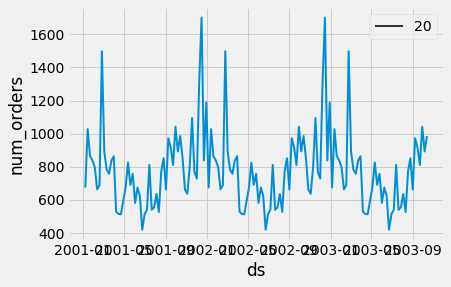

In [56]:
#To view distribution of order details with time frame
sns.lineplot(x="ds", y="num_orders",legend = 'full' , data=timeseries_data, size=20)

<Figure size 432x288 with 0 Axes>

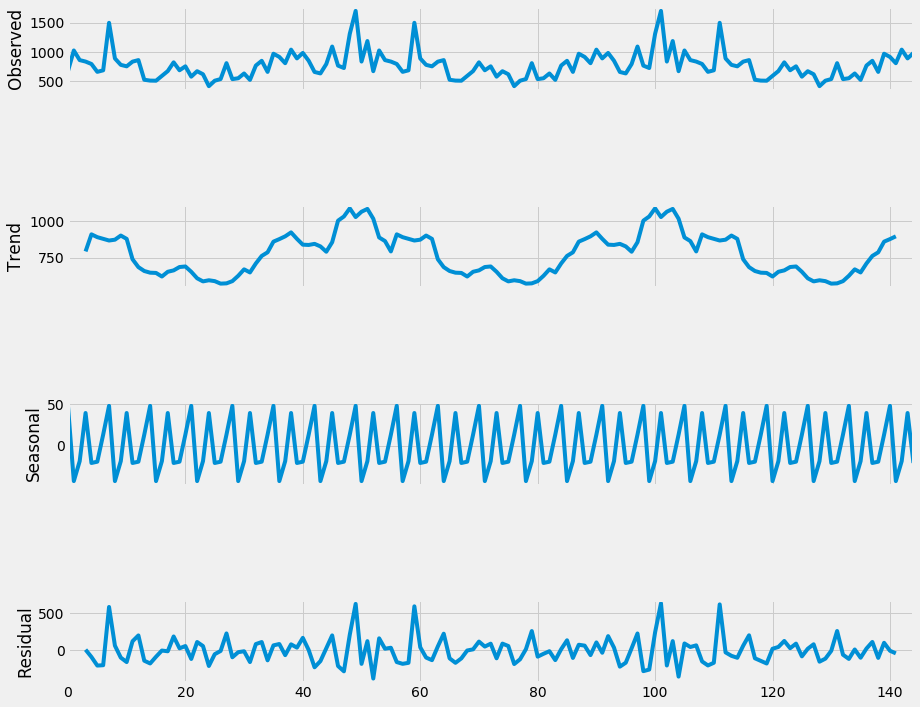

In [57]:
#Decompose the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(timeseries_data['num_orders'], model = 'additive', freq=7)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [58]:
#Creating function for ploting stationarity

from statsmodels.tsa.stattools import adfuller
    
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

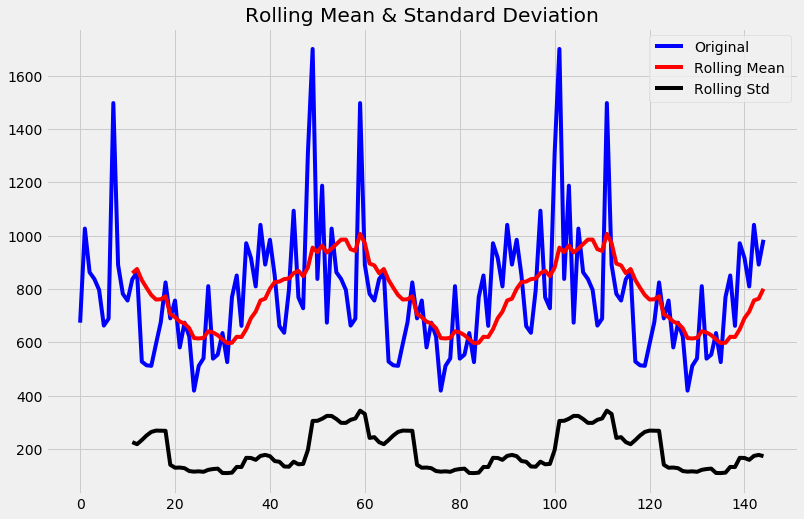

Results of Dickey-Fuller Test:
p-value = 0.0001. The series is likely stationary.
Test Statistic                  -4.779507
p-value                          0.000060
#Lags Used                      20.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [59]:
#Calling stationarity function
test_stationarity(timeseries_data['num_orders'])

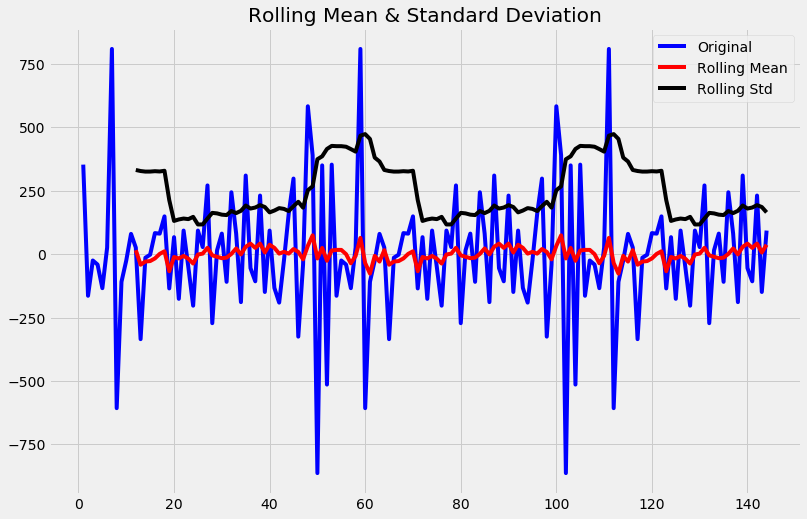

Results of Dickey-Fuller Test:
p-value = 0.0504. The series is likely non-stationary.
Test Statistic                  -2.858159
p-value                          0.050434
#Lags Used                      12.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [60]:
#Doing first order difference

first_diff = timeseries_data.num_orders - timeseries_data.num_orders.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

C:\Users\Lokesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


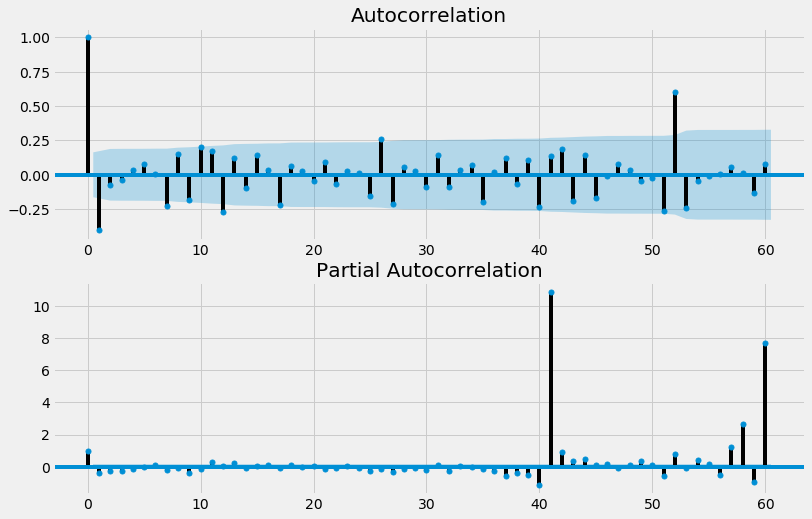

In [61]:
#Plotting ACF, PACF plot  - Differenced data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=60, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=60, ax=ax2)# 

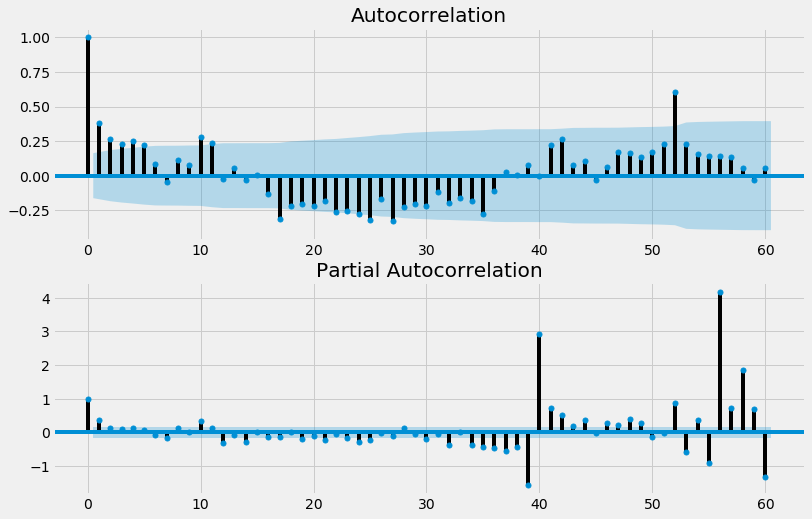

In [62]:
#Plotting ACF, PACF plot  - Original data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeseries_data.num_orders, lags=60, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeseries_data.num_orders, lags=60, ax=ax2)# 

In [63]:
#Building ARIMA model
arima_mod6 = sm.tsa.ARIMA(timeseries_data.num_orders, (6,1,0)).fit(disp=False)
print(arima_mod6.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.num_orders   No. Observations:                  144
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -978.894
Method:                       css-mle   S.D. of innovations            216.299
Date:                Thu, 28 Nov 2019   AIC                           1973.789
Time:                        12:36:13   BIC                           1997.547
Sample:                             1   HQIC                          1983.443
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8861      7.618      0.116      0.908     -14.045      15.817
ar.L1.D.num_orders    -0.6268      0.083     -7.532      0.000      -0.790      -0.464
ar.L2.D.num_orders  

In [64]:
#Train Test split
train = timeseries_data[:130]
val = timeseries_data[130:]

In [65]:
#Finding shape of train and validation data set
print(train.shape)
print(val.shape)

(130, 5)
(15, 5)


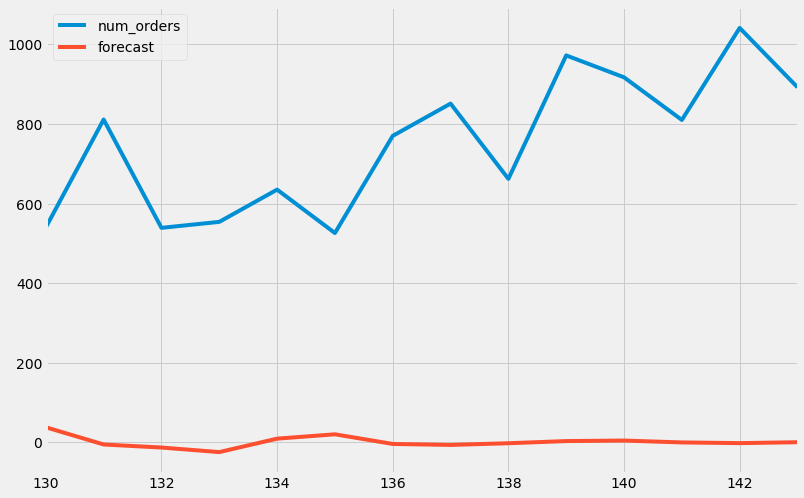

In [66]:
#Forecasting on Validation Data set
start_index = 130
end_index = 144
timeseries_data['forecast'] = arima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
timeseries_data[start_index:end_index][['num_orders', 'forecast']].plot(figsize=(12, 8))

### The difference between Actual and forecast is high

## Analyze the result

NormaltestResult(statistic=35.80168382154622, pvalue=1.681756584494126e-08)


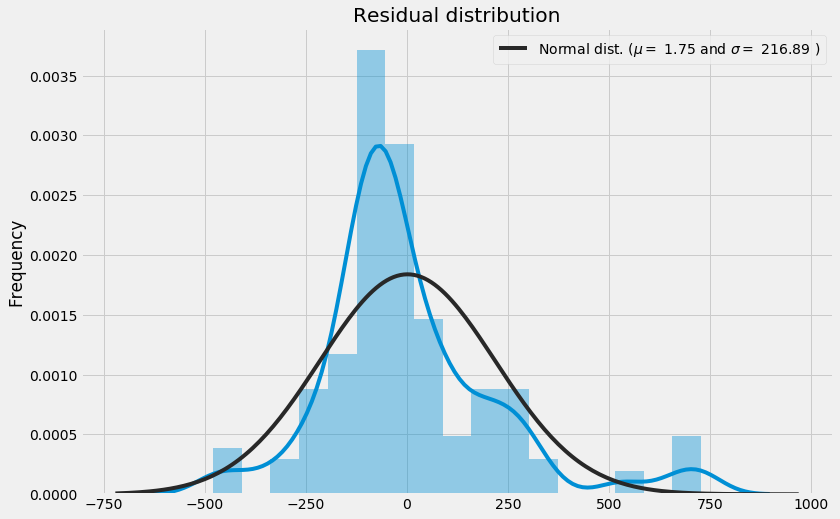

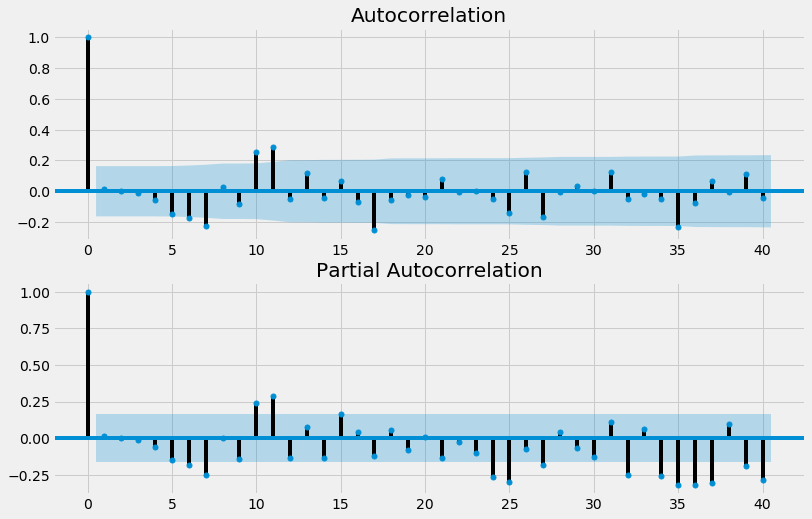

In [67]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

## Observation:

The graph looks very like a normal distribution. But it failed the P value test. 

Also we see a recurring correlation exists in both ACF and PACF. So we need to deal with seasonality

In [220]:
#Defining date for future forecast
start_index = 2003-10-19
end_index = 2003-12-9

In [230]:
#Forecasting on furture 10 weeks 
Arima_forecast = arima_mod6.forecast(10)

In [231]:
Arima_forecast

(array([959.5674833 , 944.13780566, 960.0490601 , 966.08670933,
        958.26259123, 965.14208339, 960.15911622, 963.56505967,
        966.13053254, 965.85356049]),
 array([216.29899021, 230.86790489, 240.25039446, 250.68713961,
        266.75785676, 287.59706981, 303.76982951, 313.85846752,
        325.73110463, 338.76919631]),
 array([[ 535.62925259, 1383.505714  ],
        [ 491.64502688, 1396.63058444],
        [ 489.16693968, 1430.93118051],
        [ 474.74894431, 1457.42447436],
        [ 435.42679938, 1481.09838308],
        [ 401.46218449, 1528.82198228],
        [ 364.7811908 , 1555.53704165],
        [ 348.41376709, 1578.71635226],
        [ 327.70929883, 1604.55176626],
        [ 301.87813665, 1629.82898434]]))

In [232]:
Arima_output = [959.5674833 , 944.13780566, 960.0490601 , 966.08670933,
        958.26259123, 965.14208339, 960.15911622, 963.56505967,
        966.13053254, 965.85356049]

In [267]:
Arima_output = pd.DataFrame(Arima_output)

Text(0.5, 1.0, 'Forecast for next 10 weeks')

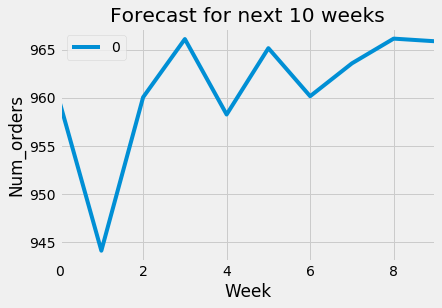

In [269]:
Arima_output.plot()
plt.xlabel('Week')
plt.ylabel('Num_orders')
plt.title('Forecast for next 10 weeks')

## Handling seasonality by SARIMA model

In [68]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(timeseries_data.num_orders, trend='n', order=(1,1,1), seasonal_order=(1, 0, 0, 52),  initialization='approximate_diffuse').fit()
print(sarima_mod6.summary())

C:\Users\Lokesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                 
Dep. Variable:                         num_orders   No. Observations:                  145
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 52)   Log Likelihood                 275.161
Date:                            Thu, 28 Nov 2019   AIC                           -542.321
Time:                                    12:36:30   BIC                           -530.442
Sample:                                         0   HQIC                          -537.494
                                            - 145                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.040    -25.155      0.000      -1.078      -0.922
ma.L1          1.0000   3.85e-08   

### Analysis the residuls

NormaltestResult(statistic=57.83685690823973, pvalue=2.7598539310687054e-13)


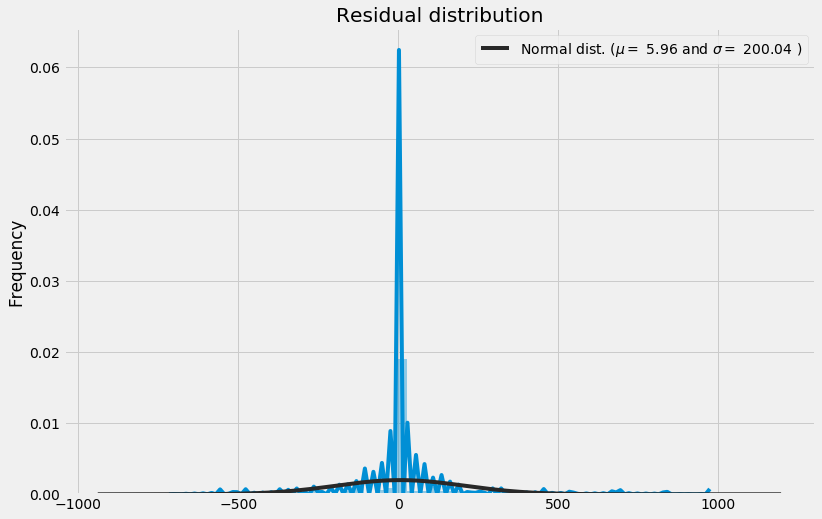

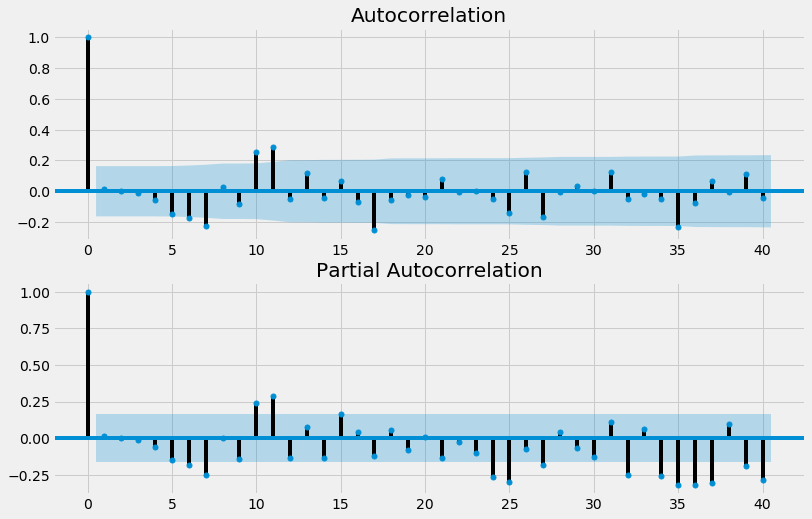

In [69]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)


## Prediction with SARIMA model

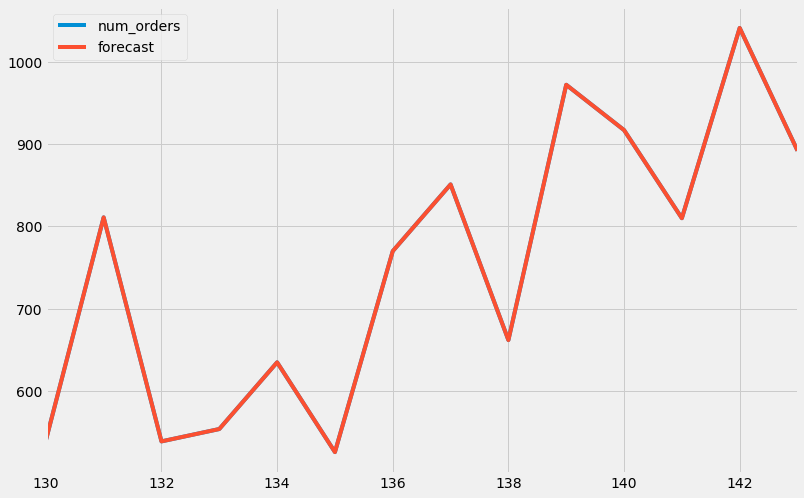

In [70]:
start_index = 130
end_index = 144
timeseries_data['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
timeseries_data[start_index:end_index][['num_orders', 'forecast']].plot(figsize=(12, 8))

## Observation: 

1. Y-actual(validation Dataset) and forecasted values are same. 

2. Data points are exactly overlapping. 

In [71]:
#Function to find MAPE
def smape_mape(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [72]:
#Finding MAPE for validation dataset
smape_mape(timeseries_data[130:144]['num_orders'],timeseries_data[130:144]['forecast'])

MAPE: 0.00 % 
SMAPE: 0.00 %


In [73]:
#Defining date for future forecast
start_index = 2003-10-19
end_index = 2003-12-9

In [74]:
#Forecasting on furture 10 weeks 
sarima_mod6.forecast(steps = 10,exog = timeseries_data[start_index:end_index])

C:\Users\Lokesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1935: ValueWarning: Exogenous array provided to predict, but additional data not required. `exog` argument ignored.
  ' required. `exog` argument ignored.', ValueWarning)


145     852.000048
146     661.000153
147     636.000150
148     796.000089
149    1093.999934
150     769.000102
151     728.000107
152    1310.999846
153    1700.999648
154     838.000069
dtype: float64

In [254]:
Sarima_forecast = sarima_mod6.forecast(steps = 10,exog = timeseries_data[start_index:end_index])

C:\Users\Lokesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1935: ValueWarning: Exogenous array provided to predict, but additional data not required. `exog` argument ignored.
  ' required. `exog` argument ignored.', ValueWarning)


In [255]:
Sarima_forecast = pd.DataFrame(Sarima_forecast)

In [260]:
Sarima_forecast.rename(columns={0:"Num_orders"})

,Num_orders
145,852.000048
146,661.000153
147,636.000150
148,796.000089
149,1093.999934
150,769.000102
151,728.000107
152,1310.999846
153,1700.999648
154,838.000069


Text(0.5, 1.0, 'Forecast for next 10 weeks')

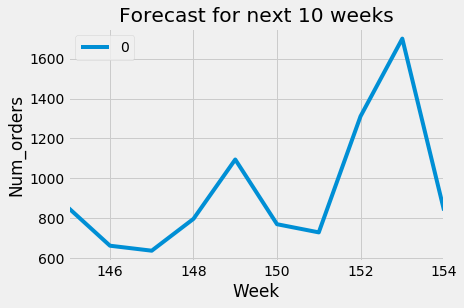

In [266]:
Sarima_forecast.plot()
plt.xlabel('Week')
plt.ylabel('Num_orders')
plt.title('Forecast for next 10 weeks')

### SARIMA Model insights
Number of orders are in between 660 to 1200 as per validation forecast 

But as per SARIMA model prediction the number of orders are between 660 to 1700 for future dates.

Only num_orders variable is used to build SARIMA Model so prediction may not be accurate.


# LSTM model

In [75]:
#Loading required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


Using TensorFlow backend.


In [81]:
#Creating lstm data frame for model building 
lstm_df = timeseries_data

In [82]:
#To view the lstm data frame
lstm_df.head(2)

,ds,week,meal_id,num_orders,center_id,forecast
0,2001-01-07,1,1885,674,66,NaN
1,2001-01-14,2,1885,1027,66,NaN


### LSTM Input Data

In [83]:
#creating dataframe
data = lstm_df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(lstm_df)),columns=['ds', 'num_orders'])
for i in range(0,len(data)):
    new_data['ds'][i] = data['ds'][i]
    new_data['num_orders'][i] = data['num_orders'][i]

In [85]:
#To view created data frame
new_data.head(2)

,ds,num_orders
0,2001-01-07 00:00:00,674
1,2001-01-14 00:00:00,1027


In [86]:
#setting index
new_data.index = new_data.ds
new_data.drop('ds', axis=1, inplace=True)


In [87]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:130,:]
valid = dataset[130:,:]

In [88]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])


### LSTM Train Test Split 

In [89]:
#Train and Test split of data

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### LSTM Model building

In [244]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2,validation_split=0.1)


Train on 90 samples, validate on 10 samples
Epoch 1/10
 - 6s - loss: 0.1263 - val_loss: 0.0136
Epoch 2/10
 - 0s - loss: 0.0756 - val_loss: 0.0078
Epoch 3/10
 - 0s - loss: 0.0417 - val_loss: 0.0433
Epoch 4/10
 - 0s - loss: 0.0449 - val_loss: 0.0518
Epoch 5/10
 - 0s - loss: 0.0433 - val_loss: 0.0290
Epoch 6/10
 - 0s - loss: 0.0376 - val_loss: 0.0153
Epoch 7/10
 - 0s - loss: 0.0377 - val_loss: 0.0114
Epoch 8/10
 - 0s - loss: 0.0387 - val_loss: 0.0112
Epoch 9/10
 - 1s - loss: 0.0379 - val_loss: 0.0132
Epoch 10/10
 - 0s - loss: 0.0365 - val_loss: 0.0174


## Visualizating Prediction output

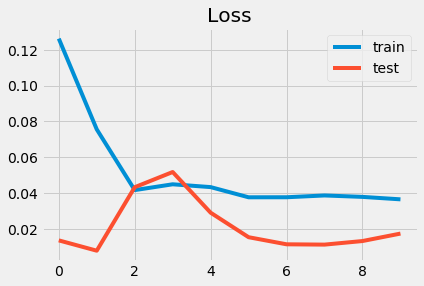

In [245]:
#Plotting Loss history
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [200]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 30 :].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_num_order = model.predict(X_test)
pred_num_order = scaler.inverse_transform(pred_num_order)

### Model Performance

In [201]:
#Calculating RMSE 
rms=np.sqrt(np.mean(np.power((valid-pred_num_order),2)))
rms

num_orders     153.453692
Predictions     30.055202
dtype: float64

In [202]:
#Calculating MAPE
mape = np.mean(abs((valid-pred_num_order)/valid))*100
mape

num_orders     19.16523
Predictions     3.43962
dtype: float64

C:\Users\Lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


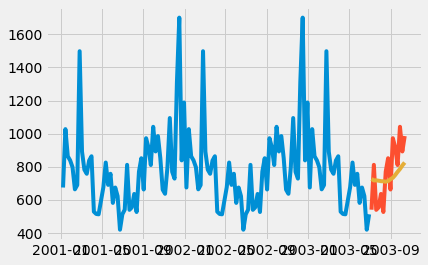

In [203]:
#for plotting
train = new_data[:130]
valid = new_data[130:]
valid['Predictions'] = pred_num_order
plt.plot(train['num_orders'])
plt.plot(valid[['num_orders','Predictions']])

In [205]:
#Creating a function to get future date

def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                  # Use this to store the prediction made on each test window]
    moving_test_window = [X_test[0,:].tolist()]        # Creating the first test window]
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:, :], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    return preds_moving


In [206]:
#Forecasting for 10 week data
preds_moving = moving_test_window_preds(10)

In [207]:
preds_moving

[0.23964117,
 0.23699015,
 0.2380984,
 0.2410983,
 0.24593207,
 0.25140998,
 0.2576332,
 0.26392078,
 0.27014515,
 0.27614477]

In [208]:
#Converting to DataFrame
preds_moving = pd.DataFrame(preds_moving)

In [209]:
#Inverse transformation of sclaed data to get prediction
preds_moving1 = scaler.inverse_transform(preds_moving)  

In [210]:
preds_moving1

array([[726.21998593],
       [722.82137716],
       [724.24214604],
       [728.08802012],
       [734.28491682],
       [741.30759138],
       [749.28577423],
       [757.34644508],
       [765.32607979],
       [773.01759869]])

In [270]:
preds_moving1 = pd.DataFrame(preds_moving1)

Text(0.5, 1.0, 'Forecast for next 10 weeks')

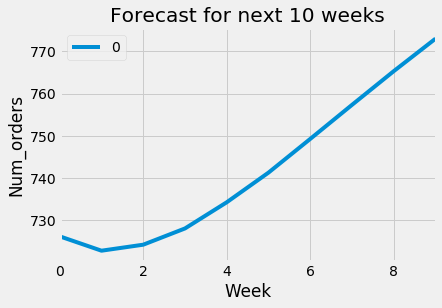

In [272]:
preds_moving1.plot()
plt.xlabel('Week')
plt.ylabel('Num_orders')
plt.title('Forecast for next 10 weeks')

In [211]:
max(preds_moving1)

array([773.01759869])

In [212]:
min(preds_moving1)

array([722.82137716])